# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 1s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
# Preprocess the data
# Adjust the input shape
X_train = X_train.reshape(-1, 28, 28, 1) # Reshape training set
X_test = X_test.reshape(-1, 28, 28, 1)   # Reshape test set

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to categories
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)





## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [ ]:

import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Build the CNN model
model = Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D tensor to 1D tensor
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))








**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/10
938/938 [==============================] - 52s 54ms/step - loss: 0.1782 - accuracy: 0.9462 - val_loss: 0.0654 - val_accuracy: 0.9798
Epoch 2/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0393 - val_accuracy: 0.9877
Epoch 3/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0301 - val_accuracy: 0.9908
Epoch 4/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0332 - val_accuracy: 0.9899
Epoch 5/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0290 - val_accuracy: 0.9920
Epoch 6/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0273 - val_accuracy: 0.9917
Epoch 7/10
938/938 [==============================] - 48s 52ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0277 - val_accuracy:

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 3s 11ms/step - loss: 0.0315 - accuracy: 0.9909
Test Accuracy: 0.9908999800682068


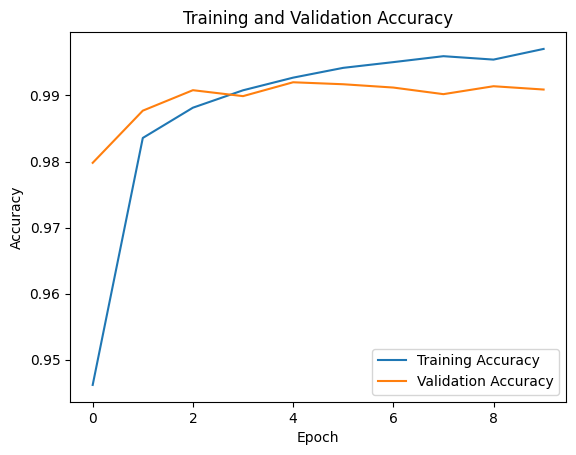

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


